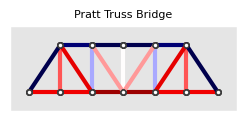

In [1]:
import numpy as np
from plane_trusses import analysis
from analisis_cerchas import *
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib para la visualización

nodes = np.array([
    [0.0, 0.0],    # Nodo 0: Soporte izquierdo
    [2.0, 0.0],    # Nodo 1
    [4.0, 0.0],    # Nodo 2
    [6.0, 0.0],    # Nodo 3
    [8.0, 0.0],    # Nodo 4
    [10.0, 0.0],   # Nodo 5
    [12.0, 0.0],   # Nodo 6: Soporte derecho
    [2.0, 3.0],    # Nodo 7: Nodo superior entre 0 y 1
    [4.0, 3.0],    # Nodo 8: Nodo superior entre 1 y 2
    [6.0, 3.0],    # Nodo 9: Nodo superior entre 2 y 3
    [8.0, 3.0],    # Nodo 10: Nodo superior entre 3 y 4
    [10.0, 3.0]    # Nodo 11: Nodo superior entre 4 y 5
])

# Definir restricciones (0 = libre, -1 = fijo en esa dirección)
# [x_constraint, y_constraint] para cada nodo
cons = np.array([
    [-1, -1],    # Nodo 0: Fijo en x e y (Soporte izquierdo)
    [0, 0],      # Nodo 1: Libre
    [0, 0],      # Nodo 2: Libre
    [0, 0],      # Nodo 3: Libre
    [0, 0],      # Nodo 4: Libre
    [0, 0],      # Nodo 5: Libre    
    [0, -1],     # Nodo 6: Fijo en x e y (Soporte derecho)
    [0, 0],      # Nodo 7: Libre
    [0, 0],      # Nodo 8: Libre
    [0, 0],      # Nodo 9: Libre
    [0, 0],      # Nodo 10: Libre
    [0, 0]       # Nodo 11: Libre
], dtype=int)

# Definir elementos (conectividad e índice de propiedades del material)
# [material_index, start_node, end_node]
elements = np.array([
    # Chord inferior (entre nodos inferiores)
    [0, 0, 1],  # Entre Nodo 0 y Nodo 1
    [0, 1, 2],  # Entre Nodo 1 y Nodo 2
    [0, 2, 3],  # Entre Nodo 2 y Nodo 3
    [0, 3, 4],  # Entre Nodo 3 y Nodo 4
    [0, 4, 5],  # Entre Nodo 4 y Nodo 5
    [0, 5, 6],  # Entre Nodo 5 y Nodo 6
    
    # Chord superior (entre nodos superiores)
    [0, 7, 8],  # Entre Nodo 7 y Nodo 8
    [0, 8, 9],  # Entre Nodo 8 y Nodo 9
    [0, 9, 10], # Entre Nodo 9 y Nodo 10
    [0, 10, 11],# Entre Nodo 10 y Nodo 11

    # Montantes verticales (conectan nodos superiores con los inferiores)
    [0, 1, 7],  # Montante entre Nodo 1 y Nodo 7
    [0, 2, 8],  # Montante entre Nodo 2 y Nodo 8
    [0, 3, 9],  # Montante entre Nodo 3 y Nodo 9
    [0, 4, 10], # Montante entre Nodo 4 y Nodo 10
    [0, 5, 11], # Montante entre Nodo 5 y Nodo 11

    # Diagonales del tipo Pratt (diagonales hacia el centro del puente)
    [0, 0, 7],  # Diagonal entre Nodo 0 y Nodo 7
    [0, 7, 2],  # Diagonal entre Nodo 7 y Nodo 2
    [0, 8, 3],  # Diagonal entre Nodo 2 y Nodo 9
    [0, 3, 10], # Diagonal entre Nodo 9 y Nodo 4
    [0, 4, 11], # Diagonal entre Nodo 4 y Nodo 11
    [0, 11, 6]  # Diagonal entre Nodo 11 y Nodo 6
])

# Definir cargas (fuerzas aplicadas en cada nodo en direcciones x e y)
# [force_x, force_y] para cada nodo
loads = np.array([
    [0.0, 0.0],  # Nodo 0: Sin carga (soporte izquierdo)
    [0.0, -2e3], # Nodo 1: Carga aplicada hacia abajo (-1e3 N)
    [0.0, -2e3], # Nodo 2: Carga aplicada hacia abajo (-1e3 N)
    [0.0, -2e3], # Nodo 3: Carga aplicada hacia abajo (-1e3 N)
    [0.0, -2e3], # Nodo 4: Carga aplicada hacia abajo (-1e3 N)
    [0.0, -2e3], # Nodo 5: Carga aplicada hacia abajo (-1e3 N)
    [0.0, 0.0],  # Nodo 6: Sin carga (soporte derecho)
    [0.0, 0.0],  # Nodo 7: Sin carga (nodo superior)
    [0.0, 0.0],  # Nodo 8: Sin carga (nodo superior)
    [0.0, 0.0],  # Nodo 9: Sin carga (nodo superior)
    [0.0, 0.0],  # Nodo 10: Sin carga (nodo superior)
    [0.0, 0.0]   # Nodo 11: Sin carga (nodo superior)
])

# Definir materiales (módulo de Young y área de la sección transversal)
# [Young's modulus, cross-sectional area]
mats = np.array([
    [200e9, 0.01]  # Índice de material 0: Acero con E = 200 GPa y A = 0.01 m²
])

# Preparar el diccionario de datos como se espera en la función de análisis
data = {
    "nodes": nodes,
    "cons": cons,
    "elements": elements,
    "loads": loads,
    "mats": mats
}
# Realizar el análisis para obtener los desplazamientos
disp = analysis(data, verbose=False)
 
# Calcular las fuerzas internas en los elementos
esfuerzos = calc_esfuerzos_int(nodes, elements, mats, disp)
 
# Visualizar los esfuerzos en la cercha
plt.figure(figsize=(70 / 25.4, 2))
plt.title("Pratt Truss Bridge", fontsize=8) 
vis_esfuerzos(nodes, elements, esfuerzos, desp=None)
plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.savefig("figs/pratt_bridge.pdf")
plt.show()